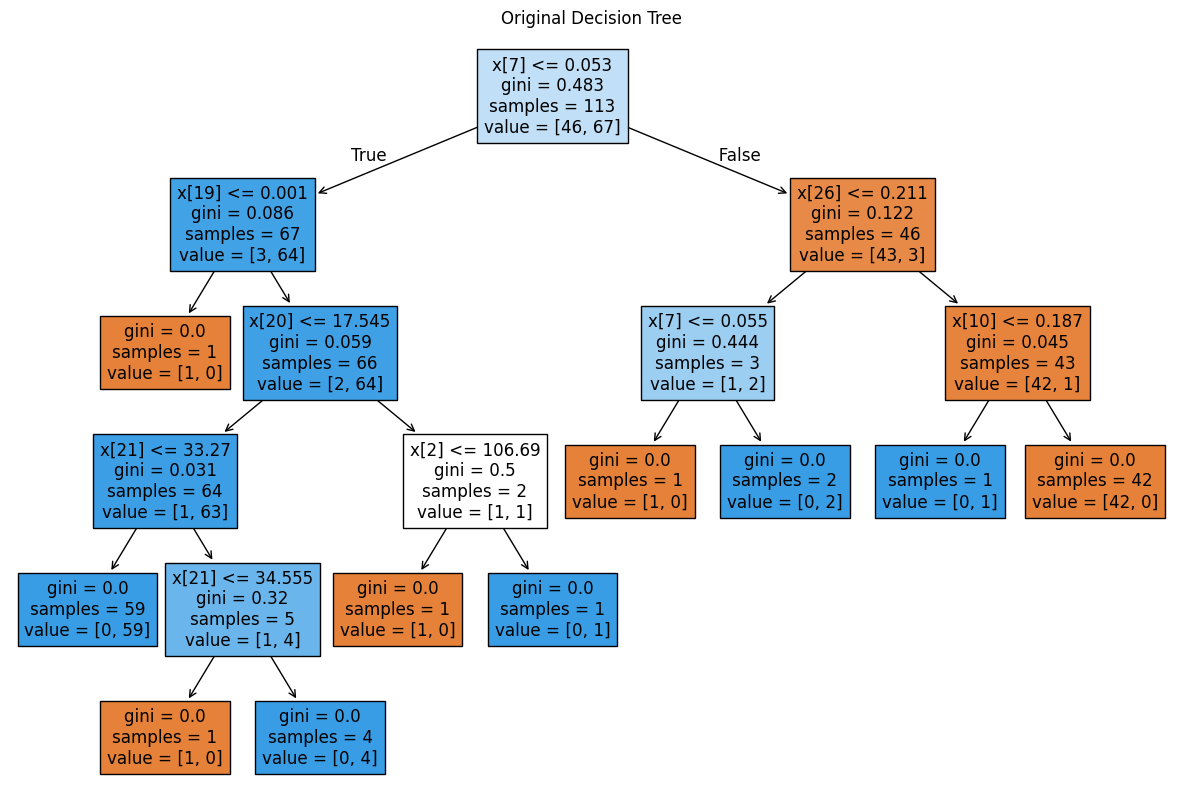

Accuracy before pruning: 0.9013157894736842


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True)
plt.title("Original Decision Tree")
plt.show()
accuracy_before_pruning = model.score(X_test, y_test)
print("Accuracy before pruning:", accuracy_before_pruning)

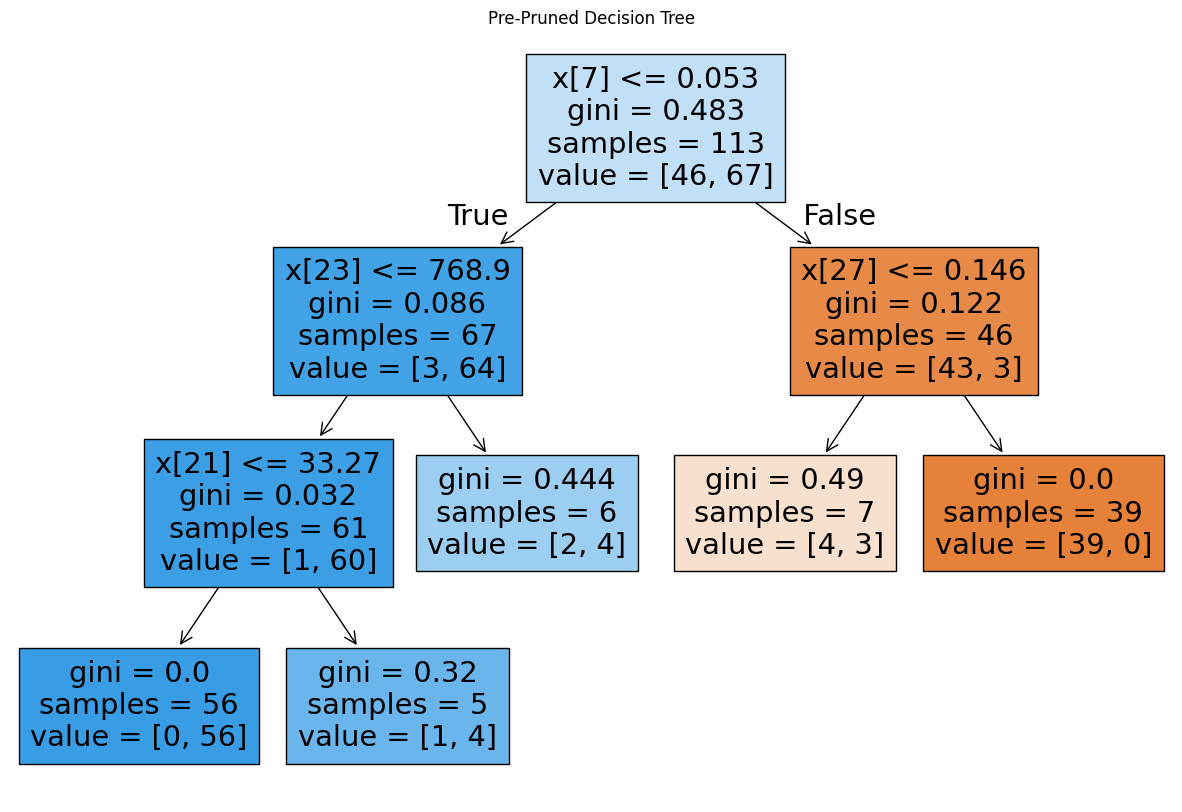

Accuracy after pre-pruning: 0.8991228070175439


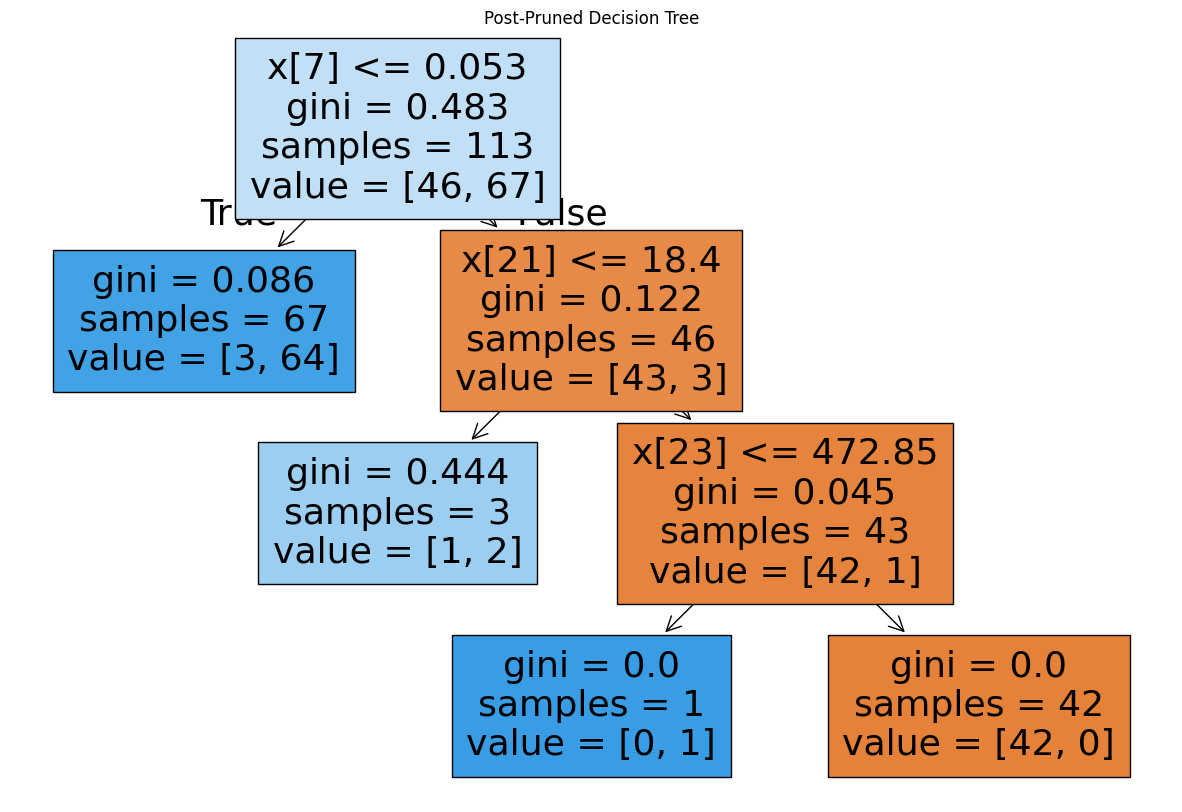

Accuracy after post-pruning: 0.9166666666666666

--- Accuracy Comparison ---
Original Tree Accuracy: 0.8882
Pre-Pruned Tree Accuracy: 0.8991
Post-Pruned Tree Accuracy: 0.9167


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)
pre_pruned_model = DecisionTreeClassifier(
    criterion="gini", max_depth=3, min_samples_leaf=5, random_state=42
)
pre_pruned_model.fit(X_train, y_train)
plt.figure(figsize=(15, 10))
plot_tree(pre_pruned_model, filled=True)
plt.title("Pre-Pruned Decision Tree")
plt.show()
accuracy_pre_pruning = pre_pruned_model.score(X_test, y_test)
print("Accuracy after pre-pruning:", accuracy_pre_pruning)
full_tree = DecisionTreeClassifier(criterion="gini", random_state=42)
full_tree.fit(X_train, y_train)
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
pruned_trees = []
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(criterion="gini", ccp_alpha=ccp_alpha, random_state=42)
    pruned_tree.fit(X_train, y_train)
    pruned_trees.append(pruned_tree)
accuracies = [tree.score(X_test, y_test) for tree in pruned_trees]
best_tree = pruned_trees[accuracies.index(max(accuracies))]
plt.figure(figsize=(15, 10))
plot_tree(best_tree, filled=True)
plt.title("Post-Pruned Decision Tree")
plt.show()
accuracy_post_pruning = best_tree.score(X_test, y_test)
print("Accuracy after post-pruning:", accuracy_post_pruning)
print("\n--- Accuracy Comparison ---")
print(f"Original Tree Accuracy: {full_tree.score(X_test, y_test):.4f}")
print(f"Pre-Pruned Tree Accuracy: {accuracy_pre_pruning:.4f}")
print(f"Post-Pruned Tree Accuracy: {accuracy_post_pruning:.4f}")
